In [8]:
# The imports
import numpy
import pandas as pd
import yfinance as yf
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Outputting the price table of a certain stock, which is currently Apple
stock = 'GOOGL'

data_for_stock = yf.Ticker(stock)
data_for_stock = data_for_stock.history(period="10y")

del data_for_stock["Dividends"]
data_for_stock["Tomorrow"] = data_for_stock["Close"].shift(-1)
data_for_stock["Target"] = (data_for_stock["Tomorrow"] > data_for_stock["Close"]).astype(int)

data_for_stock

,Open,High,Low,Close,Volume,Stock Splits,Tomorrow,Target
Date,,,,,,,,
2013-10-07 00:00:00-04:00,21.707958,21.871622,21.624374,21.665165,51692256,0.0,21.363113,0
2013-10-08 00:00:00-04:00,21.654655,21.671171,21.312061,21.363113,77670252,0.0,21.417917,1
2013-10-09 00:00:00-04:00,21.428429,21.587837,21.095596,21.417917,105945948,0.0,21.727728,1
2013-10-10 00:00:00-04:00,21.617619,21.742493,21.526777,21.727728,90121788,0.0,21.821571,1
2013-10-11 00:00:00-04:00,21.672422,21.858858,21.654154,21.821571,56299644,0.0,21.924675,1
...,...,...,...,...,...,...,...,...
2023-10-02 00:00:00-04:00,131.210007,134.419998,131.169998,134.169998,22288000,0.0,132.429993,0
2023-10-03 00:00:00-04:00,133.940002,134.259995,131.839996,132.429993,22989400,0.0,135.240005,1
2023-10-04 00:00:00-04:00,132.789993,135.570007,132.529999,135.240005,26752300,0.0,135.070007,0


Text(0.5, 1.0, 'The Stock Price')

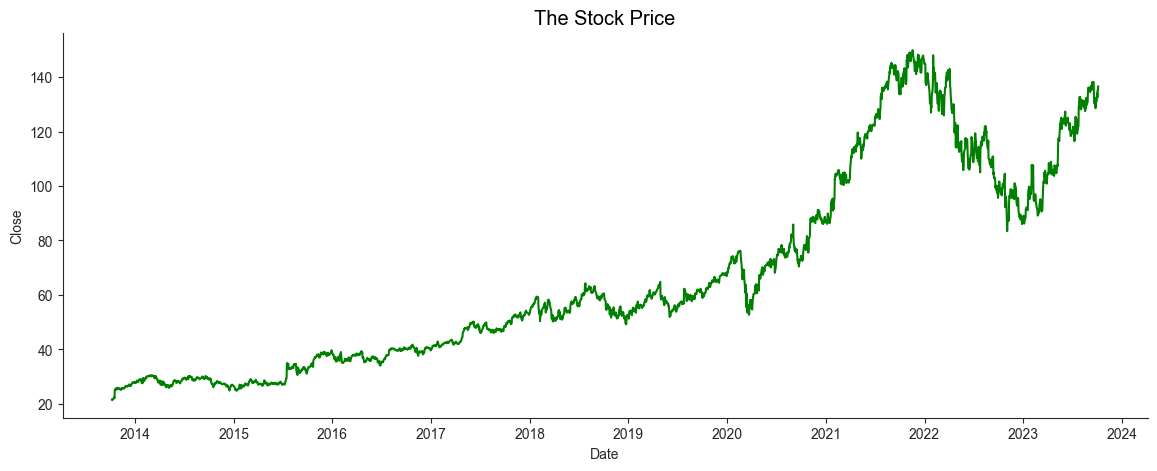

In [10]:
# The below is to plot the stocks over time.
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=data_for_stock,x="Date",y='Close',color='green')
sns.despine()
plt.title("The Stock Price",size='x-large',color='black')

In [11]:
# Creating the training and testing data
import sklearn
testing_percentage = 0.015
train_d = data_for_stock[:int(-1*len(data_for_stock)*(testing_percentage))]
test_d = data_for_stock[int(-1*len(data_for_stock)*testing_percentage):]

print(len(test_d))

37


Text(0.5, 1.0, 'The Training Data')

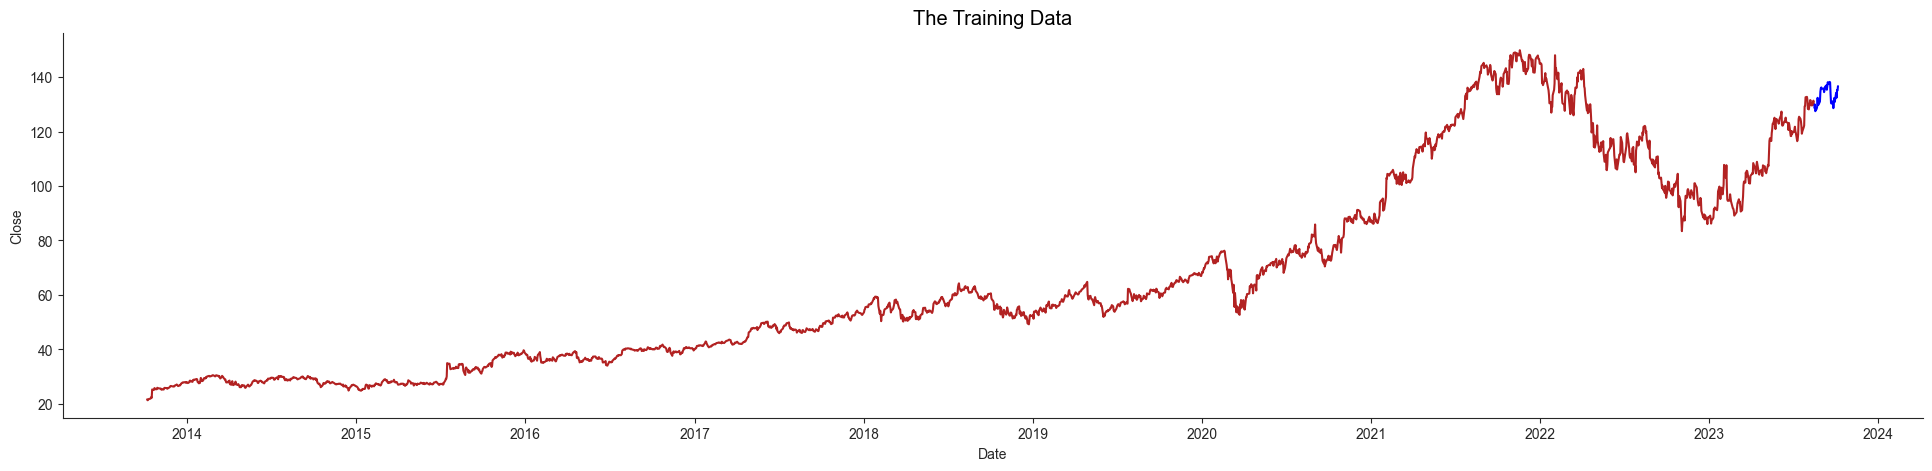

In [12]:
# Printing the training and testing data graphs
plt.figure(figsize=(24,5))
sns.set_style("ticks")
sns.lineplot(data=train_d,x="Date",y='Close',color='firebrick')
sns.lineplot(data=test_d,x="Date", y='Close', color='blue')
sns.despine()
plt.title("The Training Data",size='x-large',color='black')

In [13]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

predictors = ["Close", "Open", "High", "Low", "Volume"]
model.fit(train_d[predictors], train_d["Target"])

DecisionTreeClassifier()

In [15]:
from sklearn.metrics import precision_score

predictions = model.predict(test_d[predictors])
predictions = pd.Series(predictions, index=test_d.index)
precision_score(test_d["Target"], predictions)

0.6428571428571429